# 第十一次课-课后练习

本次作业是课后练习，供大家熟练课堂上讲授的基础知识点，不计入任何分数。

请将作业命名为 HW11-课后练习+姓名+学号.ipynb</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import jieba
import warnings
import re
warnings.filterwarnings('ignore')

## 一、中文商品评论数据的分类

本部分已经提供了参考输出，你的代码运行结果需要与之相同

### 1.1 中文语料预处理基础:分词(停用词表)

#### 1.1.1 输入数据，观察各类别评论数量
使用`pandas`输入数据，统计各类别语料的规模

In [2]:
pd_all=pd.read_csv(r'./online_shopping_10_cats.csv',encoding='utf-8')
pd_all

,cat,label,review
0,书籍,1,﻿做父母一定要有刘墉这样的心态，不断地学习，不断地进步，不断地给自己补充新鲜血液，让自己保持...
1,书籍,1,作者真有英国人严谨的风格，提出观点、进行论述论证，尽管本人对物理学了解不深，但是仍然能感受到...
2,书籍,1,作者长篇大论借用详细报告数据处理工作和计算结果支持其新观点。为什么荷兰曾经县有欧洲最高的生产...
3,书籍,1,作者在战几时之前用了＂拥抱＂令人叫绝．日本如果没有战败，就有会有美军的占领，没胡官僚主义的延...
4,书籍,1,作者在少年时即喜阅读，能看出他精读了无数经典，因而他有一个庞大的内心世界。他的作品最难能可贵...
...,...,...,...
62769,酒店,0,我们去盐城的时候那里的最低气温只有4度，晚上冷得要死，居然还不开空调，投诉到酒店客房部，得到...
62770,酒店,0,房间很小，整体设施老化，和四星的差距很大。毛巾太破旧了。早餐很简陋。房间隔音很差，隔两间房间...
62771,酒店,0,我感觉不行。。。性价比很差。不知道是银川都这样还是怎么的！
62772,酒店,0,房间时间长，进去有点异味！服务员是不是不够用啊！我在一楼找了半个小时以上才找到自己房间，想找...


In [3]:
# 统计各类别预料的规模
all_cats=pd_all['cat'].unique()
for cat in all_cats:
    # TODO
    pd_data=pd_all[pd_all['cat']==cat]
    print('{}, {}（总体）, {}（正例）, {}（负例）'.format(cat,pd_data.shape[0],pd_data[pd_data.label==1].shape[0],pd_data[pd_data.label==0].shape[0]))
    # 将cat列中为cat的行提取出来，然后统计行数，并且统计lable=1的行数与lable=0的行数

书籍, 3851（总体）, 2100（正例）, 1751（负例）
平板, 10000（总体）, 5000（正例）, 5000（负例）
手机, 2323（总体）, 1165（正例）, 1158（负例）
水果, 10000（总体）, 5000（正例）, 5000（负例）
洗发水, 10000（总体）, 5000（正例）, 5000（负例）
热水器, 575（总体）, 475（正例）, 100（负例）
蒙牛, 2033（总体）, 992（正例）, 1041（负例）
衣服, 10000（总体）, 5000（正例）, 5000（负例）
计算机, 3992（总体）, 1996（正例）, 1996（负例）
酒店, 10000（总体）, 5000（正例）, 5000（负例）


#### 1.1.2 文本预处理
- 获取停用词表
- 对文本进行分词，保留中文，去除停用词

In [4]:
# 获取停用词表
file_path=r'./cn_stopwords.txt'
def get_stopwords(file_path):
    '''
    获取停用词表
    Return:
        stopwords (list of strings): 停用词表
    '''
    # TODO
    with open(file_path,'r',encoding='utf-8') as f:
        stopwords=f.read().splitlines()
    return stopwords
    
stopwords=get_stopwords(file_path)
stopwords[:10]

['$', '0', '1', '2', '3', '4', '5', '6', '7', '8']

- 文本预处理
- 所有句子都变成空格分割，以方便调用sklearn的CountVectorizer
- 选1000个lable=1的句子，1000个lable=0的句子——取数据集中水果类别的前1000个和后1000个review
- 对去除的句子进行预处理，分词后的结果保存在corpus4bayes中

In [5]:
# 文本预处理
def preprocess(text, stopwords):
    '''预处理
       Params:
            text (string): 一个源数据中的句子
            stopwords (list of strings): 停用词表
       Return:
            text (string): 预处理后的句子
    '''
    # TODO
    # 调用jieba分词
    text=[word for word in jieba.cut(text)]
    # 仅保留中文，其余去掉
    text=[re.sub('[^\u4e00-\u9fa5]+', '', word) for word in text]
    # 去掉停用词
    text=[word for word in text if word not in stopwords and len(word)>=1]
    
    return text

# TODO
corpuses_before_1=pd_all[(pd_all['cat']=='水果')][pd_all['label']==1]['review'][:1000]
corpuses_before_2=pd_all[(pd_all['cat']=='水果')][ pd_all['label']==0]['review'][-1000:]
corpuses_before=pd.concat([corpuses_before_1,corpuses_before_2])
corpuses=[preprocess(text,stopwords) for text in corpuses_before]
corpus4bayes=[' '.join(corpus) for corpus in corpuses]
corpus4bayes[:5]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\32897\AppData\Local\Temp\jieba.cache
Loading model cost 0.825 seconds.
Prefix dict has been built successfully.


['好吃 下次 买宏辉 果蔬 好些 甜 一分钱 一分货 日期 新鲜',
 '第一次 购买 潘 苹果 甘肃 产 口感 属于 那种 粉粉 脆 感觉 陕西 那种 脆 好吃',
 '棒棒 哒 京东 太给力 苹果 没有 吃 看起来 不错',
 '水果 新鲜 希望 多出 特价 水果',
 '好吃 好吃 好吃 好吃 吃 买 喜欢']

### 1.2 在语料库级别对词汇特征进行统计:TF，IDF

- 声明TFIDF模型，默认df值从1开始，也可以设置属性过滤掉一些低频值
- 设置token_pattern=r"(?u)\b\w+\b"，包含单个汉字的词

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
# TODO
count_vect=CountVectorizer(token_pattern=r"(?u)\b\w+\b")
words_vec=count_vect.fit_transform(corpus4bayes)

print(words_vec.shape)

(2000, 4058)


- 获取需要训练的特征`feature`
- 获取训练集和测试集 
- 用`np.random.choice`随机选取80%的数据作为训练集，剩下的作为测试集

In [7]:
# TODO
features=pd.DataFrame(words_vec.toarray())
train_index=np.random.choice(range(words_vec.shape[0]),math.floor(words_vec.shape[0]*0.8),replace=False)
features4train=features[features.index.isin(train_index)]
features4test=features[~features.index.isin(train_index)]
print(features4test.shape,features4train.shape)
features4test.head()

(400, 4058) (1600, 4058)


,0,1,2,3,4,5,6,7,8,9,...,4048,4049,4050,4051,4052,4053,4054,4055,4056,4057
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- 获取训练所需的标签`label`

In [8]:
# TODO
train_index=sorted(train_index)
label=pd.Series([1]*1000+[0]*1000,index=corpuses_before.index)
label4train=label.iloc[train_index]
all_index=list(range(words_vec.shape[0]))
label4test=label.iloc[list(set(all_index) - set(train_index))]
print(label4test.shape,label4train.shape)
label4test.head()

(400,) (1600,)


16191    1
16195    1
16198    1
16212    1
16221    1
dtype: int64

- 构建数据集的函数`construct_features`
- 构建训练集与测试集
- 进行贝叶斯分类

In [9]:
import nltk
# 获取特征名
feature_names=count_vect.get_feature_names_out()
# 构建特征
def construct_features(features,labels,feature_names):
    # TODO
    feature_list=[]
    for i in range(features.shape[0]):
        text_feature={}
        for j in range(features.shape[1]):
            text_feature[feature_names[j]]=features.iloc[i,j]
        feature_list.append((text_feature,labels.iloc[i]))
    return feature_list

# TODO
# 构建训练集和测试集
train_dataset=construct_features(features4train,label4train,feature_names)
test_dataset=construct_features(features4test,label4test,feature_names)
classifier = nltk.NaiveBayesClassifier.train(train_dataset)
print(nltk.classify.accuracy(classifier, test_dataset))
classifier.show_most_informative_features(5)

0.8925
Most Informative Features
                     火龙果 = 1                   0 : 1      =     45.0 : 1.0
                      不错 = 2                   1 : 0      =     17.3 : 1.0
                       赞 = 1                   1 : 0      =     16.6 : 1.0
                      继续 = 1                   1 : 0      =     15.9 : 1.0
                      居然 = 1                   0 : 1      =     15.4 : 1.0


### 1.3 引入外部语言资源：情感词典

读取情感词典，并保留其‘词语’，‘强度’，‘极性’三列为优化分类做准备

In [10]:
df=pd.read_excel(r'./情感词汇.xlsx',keep_default_na=False)
df=df[['词语','强度','极性']]
df.head()

,词语,强度,极性
0,脏乱,7,2
1,糟报,5,2
2,早衰,5,2
3,责备,5,2
4,贼眼,5,2


将词语->极性和词语->强度的映射关系整理为两个新的字典，方便之后的处理操作

In [11]:
# TODO
sentiment_words=dict(zip(df['词语'],df['极性']))
strength_words=dict(zip(df['词语'],df['强度']))
sentiment_words

{'脏乱': 2,
 '糟报': 2,
 '早衰': 2,
 '责备': 2,
 '贼眼': 2,
 '战祸': 2,
 '招灾': 2,
 '折辱': 2,
 '中山狼': 2,
 '清峻': 0,
 '清莹': 1,
 '轻倩': 1,
 '晴丽': 1,
 '求索': 1,
 '热潮': 1,
 '仁政': 1,
 '荣名': 1,
 '柔腻': 1,
 '瑞雪': 1,
 '擅名': 1,
 '神采': 1,
 '省便': 1,
 '盛开': 1,
 '盛誉': 1,
 '诗仙': 1,
 '爽脆': 1,
 '素洁': 1,
 '诪张': 2,
 '株连': 2,
 '坠毁': 2,
 '滋生': 2,
 '自恃': 2,
 '走后门': 2,
 '阻力': 2,
 '罪状': 2,
 '做戏': 2,
 '甜头': 1,
 '头名': 1,
 '婉妙': 1,
 '温淑': 1,
 '稳厚': 1,
 '沃壤': 1,
 '无上': 1,
 '喜人': 1,
 '先贤': 1,
 '鲜妍': 1,
 '相称': 1,
 '骁骑': 1,
 '新巧': 1,
 '新意': 1,
 '信奉': 1,
 '急智': 1,
 '技艺': 1,
 '雄劲': 1,
 '雄肆': 1,
 '秀俊': 1,
 '煦煦': 1,
 '勋绩': 1,
 '雅淡': 1,
 '雅兴': 1,
 '严整': 1,
 '泱泱': 1,
 '怡悦': 1,
 '义诊': 1,
 '英发': 1,
 '英伟': 1,
 '莹润': 1,
 '勇健': 1,
 '优厚': 1,
 '幽雅': 1,
 '有识': 1,
 '友邻': 1,
 '玉人': 1,
 '元勋': 1,
 '佳句': 1,
 '佳趣': 1,
 '兼爱': 1,
 '坚守': 1,
 '简雅': 1,
 '荐举': 1,
 '见称': 1,
 '见闻': 1,
 '奖旗': 1,
 '奖许': 1,
 '姣丽': 1,
 '娇丽': 1,
 '骄子': 1,
 '解惑': 1,
 '津要': 1,
 '金嗓子': 1,
 '匀净': 1,
 '赞词': 1,
 '真纯': 1,
 '箴言': 1,
 '珍玩': 1,
 '正理': 1,
 '指导': 1,
 '至理': 1,
 '致敬': 1,
 '智多星':

- 获取数据集中的关于书籍的数据

In [12]:
target_cats=['书籍']
# 去除书籍的评论数据
pd_data=pd_all[pd_all.cat.isin(target_cats)]
# 将句序号加入dataframe中，位之后的处理做准备
sentence_id=[i+1 for i in range(len(pd_data))]
pd_data['sentence_id']=sentence_id
pd_data

,cat,label,review,sentence_id
0,书籍,1,﻿做父母一定要有刘墉这样的心态，不断地学习，不断地进步，不断地给自己补充新鲜血液，让自己保持...,1
1,书籍,1,作者真有英国人严谨的风格，提出观点、进行论述论证，尽管本人对物理学了解不深，但是仍然能感受到...,2
2,书籍,1,作者长篇大论借用详细报告数据处理工作和计算结果支持其新观点。为什么荷兰曾经县有欧洲最高的生产...,3
3,书籍,1,作者在战几时之前用了＂拥抱＂令人叫绝．日本如果没有战败，就有会有美军的占领，没胡官僚主义的延...,4
4,书籍,1,作者在少年时即喜阅读，能看出他精读了无数经典，因而他有一个庞大的内心世界。他的作品最难能可贵...,5
...,...,...,...,...
3846,书籍,0,"买回来才知道,一点都不好看....",3847
3847,书籍,0,不怎么样拉，都是很烂的笑话加几个单词而已，贵哦。得考虑呢。。。,3848
3848,书籍,0,做为一本声名在外的流行书，说的还是广州的外企，按道理应该和我的生存环境差不多啊。但是一看之下...,3849
3849,书籍,0,说实话，从理论上来说，别说求医就是求人也不如求己，但是，很多时候我们自己无法完成的事情，只能...,3850


- 评论数据预处理，切分
- 将切分后的数据作为新的一列`word`加入到数据集中，按照课件中的操作，将切分的词用空格连接为string

In [13]:
# TODO
pd_word=pd_data['review'].apply(lambda x:preprocess(x,stopwords))
pd_word=pd_word.apply(lambda x:' '.join(x))
pd_data['word']=pd_word
pd_data.head()

,cat,label,review,sentence_id,word
0,书籍,1,﻿做父母一定要有刘墉这样的心态，不断地学习，不断地进步，不断地给自己补充新鲜血液，让自己保持...,1,做 父母 一定 刘墉 心态 不断 学习 不断 进步 不断 补充 新鲜血液 保持 一颗 年轻 ...
1,书籍,1,作者真有英国人严谨的风格，提出观点、进行论述论证，尽管本人对物理学了解不深，但是仍然能感受到...,2,作者 真有 英国人 严谨 风格 提出 观点 进行 论述 论证 物理学 了解 不深 仍然 感受...
2,书籍,1,作者长篇大论借用详细报告数据处理工作和计算结果支持其新观点。为什么荷兰曾经县有欧洲最高的生产...,3,作者 长篇大论 借用 详细 报告 数据处理 工作 计算结果 支持 其新 观点 荷兰 曾经 县...
3,书籍,1,作者在战几时之前用了＂拥抱＂令人叫绝．日本如果没有战败，就有会有美军的占领，没胡官僚主义的延...,4,作者 战 之前 拥抱 令人 叫绝 日本 没有 战败 会 美军 占领 没胡 官僚主义 延续 没...
4,书籍,1,作者在少年时即喜阅读，能看出他精读了无数经典，因而他有一个庞大的内心世界。他的作品最难能可贵...,5,作者 少年 时即 喜 阅读 看出 精读 无数 经典 一个 庞大 内心世界 作品 难能可贵 两...


- 设计通过情感词典进行的句子情感特征提取，设计初步方案

In [14]:
def sentiment_analysis(df,sentiment_words,strength_words):
    '''
    sentiment_score:该句的总情感强度得分
    positive_score:该句的正向情感强度得分
    negative_score:该句的负向情感强度得分
    '''
    sentiment_score=0
    positive_score=0
    negative_score=0
    # 遍历当前句的每个词
    # TODO
    for w in df['word'].split():
        if w in sentiment_words.keys():
            if sentiment_words[w]==1:
                positive_score+=strength_words[w]
                sentiment_score+=strength_words[w]
            else:
                negative_score+=strength_words[w]
                sentiment_score-=strength_words[w]
    
    return sentiment_score,positive_score,negative_score            

- 构造新的特征（三个score）`new_features`
- 获取数据的标签`labels`

In [15]:
# TODO
new_features=pd_data.apply(lambda x:sentiment_analysis(x,sentiment_words,strength_words),axis=1,result_type='expand')
new_features.columns=['sentiment_score','positive_score','negative_score']
labels=pd_data['label']
new_features,labels

(      sentiment_score  positive_score  negative_score
 0                 -17              29              46
 1                  20              28               8
 2                  27              35               8
 3                  -7              21              28
 4                  32              38               6
 ...               ...             ...             ...
 3846                0               0               0
 3847               -4               0               4
 3848               -2              10              12
 3849               -8               7              15
 3850               21              31              10
 
 [3851 rows x 3 columns],
 0       1
 1       1
 2       1
 3       1
 4       1
        ..
 3846    0
 3847    0
 3848    0
 3849    0
 3850    0
 Name: label, Length: 3851, dtype: int64)

常规的向量化-降维-贝叶斯分类训练

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# TODO
# 进行训练集和测试集的划分，test_size=0.1
X_train,X_test,y_train,y_test=train_test_split(new_features,labels,test_size=0.1,random_state=42)
# 进行贝叶斯模型的初始化和训练
gnb=GaussianNB()
gnb.fit(X_train,y_train)

# # 在测试集上进行预测
y_pred=gnb.predict(X_test)
# 计算预测的效果，使用f1_score
f1=f1_score(y_test,y_pred,average='binary')
print('F1 score:',f1)

F1 score: 0.6941176470588236


#### 1.3.1 情感词典优化

In [17]:
# 情感分析函数
def my_sentiment_analysis(df,sentiment_words,strength_words):
    '''
    sentiment_score:该句的总情感强度得分
    positive_score:该句的正向情感强度得分
    negative_score:该句的负向情感强度得分
    sentiment:该句的情感极性，1表示正向，0表示负向
    positive_count:正向词占比
    negative_count:负向词占比
    '''
    positive_count=0
    negative_count=0
    positive_score=0
    negative_score=0
    
    length=len(df)
    
    # TODO
    for w in df['word'].split():
        if w in sentiment_words.keys():
            if sentiment_words[w]==1:
                positive_score+=strength_words[w]
                positive_count+=1
            else:
                
                negative_score+=strength_words[w]
                negative_count+=1
    positive_count=positive_count/length
    negative_count=negative_count/length
    sentiment_score=positive_score-negative_score
    if sentiment_score>0:
        sentiment=1
    else:
        sentiment=0
    return sentiment_score,positive_score,negative_score,sentiment,positive_count,negative_count

- 构造新的特征`new_features1`

In [18]:
# TODO
new_features1=pd_data.apply(lambda x:my_sentiment_analysis(x,sentiment_words,strength_words),axis=1,result_type='expand')
new_features1.columns=['sentiment_score','positive_score','negative_score','sentiment','positive_count','negative_count']
new_features1

,sentiment_score,positive_score,negative_score,sentiment,positive_count,negative_count
0,-17.0,29.0,46.0,0.0,1.0,2.0
1,20.0,28.0,8.0,1.0,1.2,0.4
2,27.0,35.0,8.0,1.0,1.4,0.4
3,-7.0,21.0,28.0,0.0,0.6,0.8
4,32.0,38.0,6.0,1.0,1.6,0.4
...,...,...,...,...,...,...
3846,0.0,0.0,0.0,0.0,0.0,0.0
3847,-4.0,0.0,4.0,0.0,0.0,0.4
3848,-2.0,10.0,12.0,0.0,0.4,0.4
3849,-8.0,7.0,15.0,0.0,0.2,0.6


使用新的特征进行常规的向量化-降维-贝叶斯分类训练

In [19]:
# TODO
X_train,X_test,y_train,y_test=train_test_split(new_features1,labels,test_size=0.1,random_state=42)
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
f1=f1_score(y_test,y_pred,average='binary')
print('F1 score:',f1)

F1 score: 0.717201166180758


- 加入新的特征之后进行情感分析

In [20]:
def my_sentiment_analysis1(df,sentiment_words,strength_words,category_words,dict4catwords):
    sentiment_score=0
    positive_score=0
    negative_score=0
    category_score=0
    
    # TODO
    for word in df['word'].split():
        if word in sentiment_words.keys():
            category_score+=dict4catwords[category_words[word]]
            if sentiment_words[word]==1:
                positive_score+=strength_words[word]
                sentiment_score+=strength_words[word]
            else:
                negative_score+=strength_words[word]
                sentiment_score-=strength_words[word]
    
    return sentiment_score,positive_score,negative_score,category_score

In [21]:
df=pd.read_excel(r'./情感词汇.xlsx',keep_default_na=False)
df=df[['词语','强度','极性','情感分类']]
category_words=dict(zip(df['词语'],df['情感分类']))
dict4catwords=dict(df.groupby('情感分类')['词语'].count())
df.head(),category_words,dict4catwords

(   词语  强度  极性 情感分类
 0  脏乱   7   2   NN
 1  糟报   5   2   NN
 2  早衰   5   2   NE
 3  责备   5   2   NN
 4  贼眼   5   2   NN,
 {'脏乱': 'NN',
  '糟报': 'NN',
  '早衰': 'NE',
  '责备': 'NN',
  '贼眼': 'NN',
  '战祸': 'ND',
  '招灾': 'NN',
  '折辱': 'NE',
  '中山狼': 'NN',
  '清峻': 'PH',
  '清莹': 'PH',
  '轻倩': 'PH',
  '晴丽': 'PH',
  '求索': 'PH',
  '热潮': 'PH',
  '仁政': 'PH',
  '荣名': 'PH',
  '柔腻': 'PH',
  '瑞雪': 'PA',
  '擅名': 'PD',
  '神采': 'PA',
  '省便': 'PH',
  '盛开': 'PH',
  '盛誉': 'PH',
  '诗仙': 'PH',
  '爽脆': 'PH',
  '素洁': 'PH',
  '诪张': 'NN',
  '株连': 'NN',
  '坠毁': 'NB',
  '滋生': 'NN',
  '自恃': 'NN',
  '走后门': 'NN',
  '阻力': 'NN',
  '罪状': 'NN',
  '做戏': 'NN',
  '甜头': 'PB',
  '头名': 'PH',
  '婉妙': 'PH',
  '温淑': 'PB',
  '稳厚': 'PH',
  '沃壤': 'PH',
  '无上': 'PH',
  '喜人': 'PA',
  '先贤': 'PD',
  '鲜妍': 'PH',
  '相称': 'PH',
  '骁骑': 'PH',
  '新巧': 'PH',
  '新意': 'PH',
  '信奉': 'PG',
  '急智': 'PH',
  '技艺': 'PH',
  '雄劲': 'PH',
  '雄肆': 'PH',
  '秀俊': 'PH',
  '煦煦': 'PH',
  '勋绩': 'PH',
  '雅淡': 'PH',
  '雅兴': 'PH',
  '严整': 'PH',
  '泱泱': 'PH',
  '怡悦': '

- 构造新的特征`new_features2`

In [22]:
# TODO
new_features2=pd_data.apply(lambda x:my_sentiment_analysis1(x,sentiment_words,strength_words,category_words,dict4catwords),axis=1,result_type='expand')
new_features2.columns=['sentiment_score','positive_score','negative_score','category_score']
new_features2

,sentiment_score,positive_score,negative_score,category_score
0,-17,29,46,72532
1,20,28,8,21717
2,27,35,8,68188
3,-7,21,28,34156
4,32,38,6,61748
...,...,...,...,...
3846,0,0,0,0
3847,-4,0,4,15166
3848,-2,10,12,18200
3849,-8,7,15,9775


使用新的特征进行常规的向量化-降维-贝叶斯分类训练

In [23]:
# TODO
X_train,X_test,y_train,y_test=train_test_split(new_features2,labels,test_size=0.1,random_state=42)
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
f1=f1_score(y_test,y_pred,average='binary')
print('F1 score:',f1)

F1 score: 0.7155425219941348


## 二、网络(图)分析基础

### 2.1 熟悉图分析软件包NetworkX的基本使用

#### 2.1.1 图的创建
请按照给出的例子创建一个无向图，并绘制带节点标签的图片(具体相对位置可能有所不同，保证节点和边一致即可)

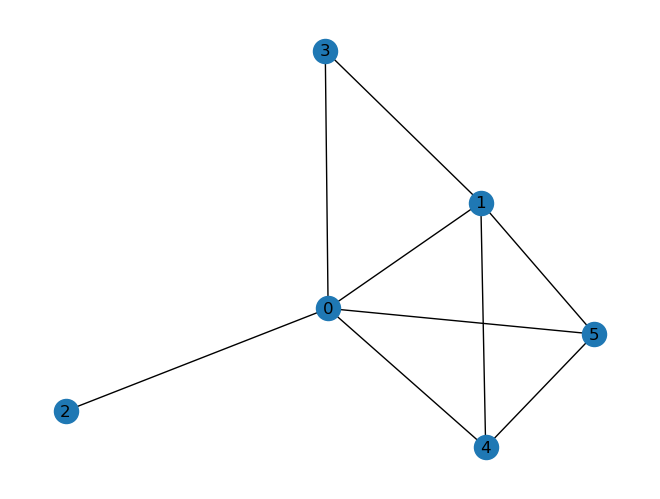

In [24]:
import networkx as nx
#TODO:
G=nx.Graph()
elist=[(3,0),(3,1),(1,0),(1,5),(1,4),(5,0),(5,4),(4,0),(0,2)]
G.add_edges_from(elist)
nx.draw(G,with_labels=True)

#### 2.1.2 修改Graph
对上面的无向图进行修改，添加6号节点，添加边（1，6），并绘制带标签的图片

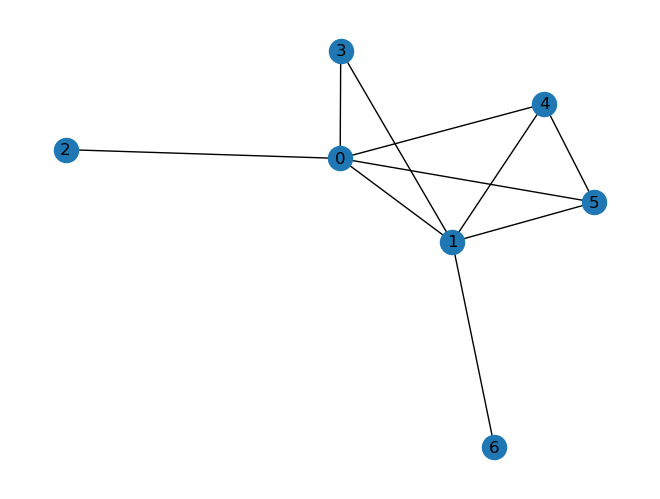

In [25]:
#TODO:
G.add_edge(1,6)
nx.draw(G,with_labels=True)

### 2.1.3 添加节点属性
对每一个节点添加weight属性，其值为节点的度数，并绘制带标签的图片，要求节点的大小和weight的大小成正比

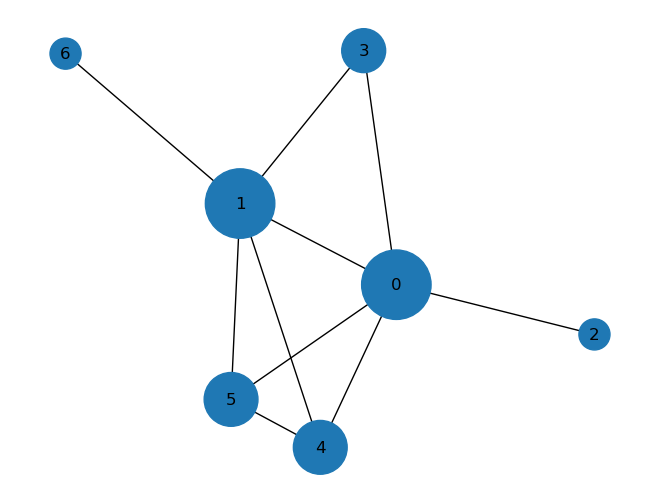

In [26]:
#TODO:
weight_dict=dict(G.degree())
for i in weight_dict.keys():
    G.nodes[i]['weight']=weight_dict[i]
node_weight=list(nx.get_node_attributes(G,'weight').values())
nx.draw(G,with_labels=True,node_size=[i*500 for i in node_weight])

#### 2.1.4 点中心度计算
计算每个节点的点中心度，并将其作为centrality属性添加到节点属性中，并按照示例输出打印节点的信息

In [27]:
#TODO:
centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, centrality, 'centrality')

for i in sorted(G.nodes.data()):
    print('Node:',i[0],' ','Attributes:',i[1])

Node: 0   Attributes: {'weight': 5, 'centrality': 0.8333333333333333}
Node: 1   Attributes: {'weight': 5, 'centrality': 0.8333333333333333}
Node: 2   Attributes: {'weight': 1, 'centrality': 0.16666666666666666}
Node: 3   Attributes: {'weight': 2, 'centrality': 0.3333333333333333}
Node: 4   Attributes: {'weight': 3, 'centrality': 0.5}
Node: 5   Attributes: {'weight': 3, 'centrality': 0.5}
Node: 6   Attributes: {'weight': 1, 'centrality': 0.16666666666666666}
